# Stock Higher Partial Moment Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol = '^NSEBANK' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def hpm(stock_returns, threshold=0.0, order=1):
    threshold_array = np.empty(len(stock_returns))
    threshold_array.fill(threshold)
    diff = stock_returns - threshold_array
    diff = diff.clip()
    return np.sum(diff ** order) / len(stock_returns)

Text(0, 0.5, 'Higher Partial Moment')

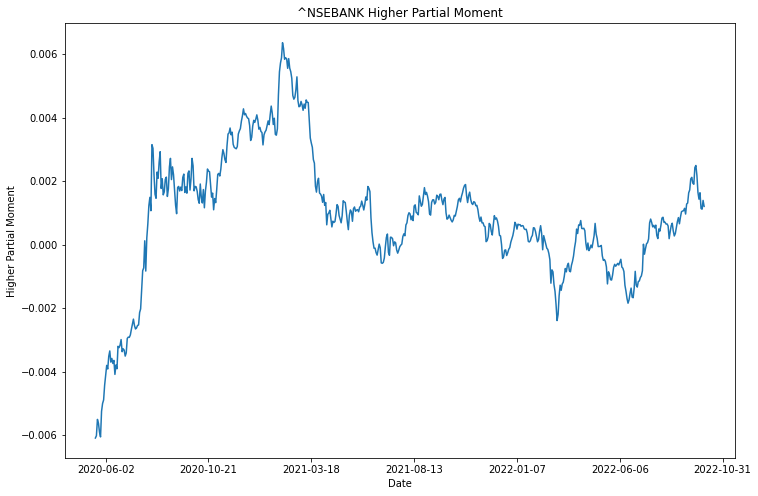

In [6]:
# Compute the running Higher Partial Moment
running = [hpm(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Higher Partial Moment up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Higher Partial Moment')
plt.xlabel('Date')
plt.ylabel('Higher Partial Moment')

In [7]:
stock_hpm = hpm(stocks_returns)
stock_hpm

0.0004601173185453516

In [8]:
running = [hpm(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[-0.006088887422184535,
 -0.0060155726858328535,
 -0.00550236663320683,
 -0.00562553741025,
 -0.005902235619098113,
 -0.006052965099674744,
 -0.005245460228629776,
 -0.005000518954834212,
 -0.004890044924014718,
 -0.0044230139990508845,
 -0.0041156686439485874,
 -0.0038016780946999893,
 -0.003914261383577735,
 -0.0035157250618056066,
 -0.003346626727883967,
 -0.0036986588873764974,
 -0.003582692502777296,
 -0.003741647694300882,
 -0.003644214775028033,
 -0.004084940588630517,
 -0.0037881649161954517,
 -0.003907648890027693,
 -0.0032006250408029018,
 -0.0032437251631409745,
 -0.0031650765608816312,
 -0.0029884868004283866,
 -0.0033704937829460726,
 -0.0032781385505150505,
 -0.00332049473314199,
 -0.003508684520263931,
 -0.003410217024902905,
 -0.0029536900503428967,
 -0.00291049608860221,
 -0.0029187067148197334,
 -0.0028427310354674274,
 -0.002665687520186972,
 -0.002511829322586667,
 -0.0023449704899800076,
 -0.002545791060811118,
 -0.002655234320688835,
 -0.0026231147447975155,
 -0.0